<a href="https://colab.research.google.com/github/kwankoravich/capturing_CO2_working_cap_MOFs/blob/main/Deep_Learning_TMLCC_koravich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing Data

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasRegressor

import warnings
import time
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train-12-10_edited.csv', index_col=['MOFname'])

In [ ]:
df = df[(df['surface_area [m^2/g]']) != 0 ]
df = df[(df['CO2/N2_selectivity'] <= 300)]
df = df[(df['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]'] <= 12.5)]
# df = df[(df['CO2_working_capacity [mL/g]'] <= 640)]

# Clustering

In [ ]:
data = df[['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]','CO2_working_capacity [mL/g]']]
data

,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
MOFname,,
mof_unit_2,7.147286,101.224774
mof_unit_3,6.347967,118.987011
mof_unit_4,6.190085,187.626004
mof_unit_6,5.398304,55.786959
mof_unit_7,6.303857,111.690462
...,...,...
mof_unit_66520,4.485481,7.602105
mof_unit_66521,3.605688,2.675231
mof_unit_66522,3.361233,-1.686092


In [ ]:
#from pycaret.clustering import *
#exp_name = setup(data = data)

In [ ]:
#kmeans = create_model('kmeans', num_clusters = 2)

In [ ]:
#plot_model(kmeans, plot = 'cluster')

In [ ]:
#df = predict_model(model = dbscan, data = df)

In [ ]:
def class_label(data):
    val = 0
    # if data>=590:
    #     val = '3'
    if data>=450:
        val = '2'
    elif data >= 20:
        val = '1'
    else:
        val = '0'
    return val
df['Cluster'] = df['CO2_working_capacity [mL/g]'].apply(class_label)

In [ ]:
df

,volume [A^3],weight [u],num_atom_mof,density [g/cm3],Di-LCD [A],Df-PLD [A],Dif [A],surface_area [m^2/g],void_volume [cm^3/g],calc_void fraction,functional_groups 1,mnc_fg-1,num_fg-1,FG1 density [gr/A^3],FG1 charge density,functional_groups 2,mnc_fg-2,num_fg-2,FG2 density [gr/A^3],FG2 charge density,metal_linker,metal_atom,num_metal,q_metal,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,CO2_working_capacity [mL/g],Cm_x,Cm_y,Cm_z,inertia_x,inertia_y,inertia_z,Cluster
MOFname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mof_unit_2,2769.503842,2211.697211,180,1.326058,7.31755,6.28759,7.31755,603.61,0.1040,0.137910,F,-0.701340,11,0.003972,-0.002786,OMe,-0.595762,11,0.003972,-0.002366,10,In,2,1.204092,44,57,etb,33.616780,7.147286,8.463295,17.684225,18.960098,100.063446,91.815775,96.942210,101.224774,7.288468,6.223134,13.622231,18976.274960,75953.676060,78366.81753,1
mof_unit_3,1089.818728,773.687960,92,1.178828,6.73435,4.65130,6.73435,788.50,0.1262,0.148768,OMe,-0.790910,2,0.001835,-0.001451,COOH,-0.532949,2,0.001835,-0.000978,2,Cu,2,0.946149,22,24,pcu,19.263726,6.347967,10.732110,9.552271,10.631996,89.202223,89.943258,90.387501,118.987011,2.569222,7.019496,8.114622,14031.175570,30945.419900,38479.32198,1
mof_unit_4,2205.198301,1304.638720,96,0.982384,6.32917,5.77752,6.32917,1441.53,0.2220,0.218089,H,0.123086,27,0.012244,0.001507,SO3H,-0.531874,1,0.000453,-0.000241,9,V,4,1.411146,17,24,sra,25.701377,6.190085,6.935530,17.504896,19.274980,109.537419,90.234580,90.532988,187.626004,5.467039,4.018653,5.337372,18664.701690,45604.342190,48779.61762,1
mof_unit_6,3954.659761,1543.027680,94,0.647893,12.20304,11.77350,12.20304,2430.55,0.5725,0.370919,Pr,-0.420021,2,0.000506,-0.000212,NO2,-0.915682,4,0.001011,-0.000926,9,V,4,1.193537,7,23,sra,17.146541,5.398304,24.949291,7.054011,22.606019,90.036873,96.274104,89.946334,55.786959,3.572366,7.262021,9.055061,22647.711090,26364.263600,40777.31600,1
mof_unit_7,3565.914939,1954.749656,108,0.910247,12.00479,10.98421,12.00316,1530.02,0.3662,0.333332,NH2,0.162418,59,0.016546,0.002687,H,-0.479647,5,0.001402,-0.000673,10,In,2,1.641524,53,55,etb,18.363791,6.303857,8.286700,19.200319,22.787351,100.168180,89.967715,92.229090,111.690462,7.181320,3.805409,8.389177,36652.970820,37119.435090,63644.09720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_66520,1426.479810,1272.451540,94,1.481203,6.86894,5.52882,6.86894,1343.62,0.2038,0.301869,Me,-0.235586,6,0.004206,-0.000991,I,-0.831288,2,0.001402,-0.001166,3,Zn,2,1.025892,12,21,pcu,5.867674,4.485481,10.277785,10.671366,13.626838,93.277966,74.428678,97.667494,7.602105,7.052058,4.682840,4.904125,7987.109033,14385.993050,14800.67422,0
mof_unit_66521,23943.701370,5497.752320,58,0.381270,19.22726,16.68686,18.97525,4182.24,1.7399,0.663372,HCO,-0.567331,16,0.000668,-0.000379,Me,-0.807710,8,0.000334,-0.000270,1,Zn,16,0.971793,9,27,pcu,4.060772,3.605688,25.892701,43.014841,25.102146,89.999427,121.083481,90.000229,2.675231,5.502832,5.448685,5.399288,6695.842619,7934.213960,10100.90800,0
mof_unit_66522,14389.971560,4396.164320,75,0.507286,12.90542,9.32427,12.90509,4149.64,1.1246,0.570494,OPr,-0.611660,8,0.000556,-0.000340,Cl,-0.931989,8,0.000556,-0.000518,1,Zn,16,1.010950,9,20,pcu,4.313411,3.361233,26.397988,33.011322,21.131416,89.999962,128.607067,90.000014,-1.686092,3.639808,7.393084,6.538785,8022.349216,9303.869413,11629.77185,0


# Train dataset

In [ ]:
df.loc[: ,'FG1 charge density'] = df['num_fg-1']/df['num_atom_mof']*df['volume [A^3]']*df['mnc_fg-1']
df.loc[: ,'FG2 charge density'] = df['num_fg-2']/df['num_atom_mof']*df['volume [A^3]']*df['mnc_fg-2']
df.loc[: ,'metal charge density'] = df['num_metal']/df['num_atom_mof']*df['volume [A^3]']*df['q_metal']
df

,volume [A^3],weight [u],num_atom_mof,density [g/cm3],Di-LCD [A],Df-PLD [A],Dif [A],surface_area [m^2/g],void_volume [cm^3/g],calc_void fraction,functional_groups 1,mnc_fg-1,num_fg-1,FG1 density [gr/A^3],FG1 charge density,functional_groups 2,mnc_fg-2,num_fg-2,FG2 density [gr/A^3],FG2 charge density,metal_linker,metal_atom,num_metal,q_metal,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,CO2_working_capacity [mL/g],Cm_x,Cm_y,Cm_z,inertia_x,inertia_y,inertia_z,Cluster,metal charge density
MOFname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mof_unit_2,2769.503842,2211.697211,180,1.326058,7.31755,6.28759,7.31755,603.61,0.1040,0.137910,F,-0.701340,11,0.003972,-118.699996,OMe,-0.595762,11,0.003972,-100.831219,10,In,2,1.204092,44,57,etb,33.616780,7.147286,8.463295,17.684225,18.960098,100.063446,91.815775,96.942210,101.224774,7.288468,6.223134,13.622231,18976.274960,75953.676060,78366.81753,1,37.052623
mof_unit_3,1089.818728,773.687960,92,1.178828,6.73435,4.65130,6.73435,788.50,0.1262,0.148768,OMe,-0.790910,2,0.001835,-18.738023,COOH,-0.532949,2,0.001835,-12.626474,2,Cu,2,0.946149,22,24,pcu,19.263726,6.347967,10.732110,9.552271,10.631996,89.202223,89.943258,90.387501,118.987011,2.569222,7.019496,8.114622,14031.175570,30945.419900,38479.32198,1,22.415889
mof_unit_4,2205.198301,1304.638720,96,0.982384,6.32917,5.77752,6.32917,1441.53,0.2220,0.218089,H,0.123086,27,0.012244,76.339669,SO3H,-0.531874,1,0.000453,-12.217580,9,V,4,1.411146,17,24,sra,25.701377,6.190085,6.935530,17.504896,19.274980,109.537419,90.234580,90.532988,187.626004,5.467039,4.018653,5.337372,18664.701690,45604.342190,48779.61762,1,129.660698
mof_unit_6,3954.659761,1543.027680,94,0.647893,12.20304,11.77350,12.20304,2430.55,0.5725,0.370919,Pr,-0.420021,2,0.000506,-35.341322,NO2,-0.915682,4,0.001011,-154.093991,9,V,4,1.193537,7,23,sra,17.146541,5.398304,24.949291,7.054011,22.606019,90.036873,96.274104,89.946334,55.786959,3.572366,7.262021,9.055061,22647.711090,26364.263600,40777.31600,1,200.852373
mof_unit_7,3565.914939,1954.749656,108,0.910247,12.00479,10.98421,12.00316,1530.02,0.3662,0.333332,NH2,0.162418,59,0.016546,316.398087,H,-0.479647,5,0.001402,-79.184278,10,In,2,1.641524,53,55,etb,18.363791,6.303857,8.286700,19.200319,22.787351,100.168180,89.967715,92.229090,111.690462,7.181320,3.805409,8.389177,36652.970820,37119.435090,63644.09720,1,108.398762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_66520,1426.479810,1272.451540,94,1.481203,6.86894,5.52882,6.86894,1343.62,0.2038,0.301869,Me,-0.235586,6,0.004206,-21.450508,I,-0.831288,2,0.001402,-25.230133,3,Zn,2,1.025892,12,21,pcu,5.867674,4.485481,10.277785,10.671366,13.626838,93.277966,74.428678,97.667494,7.602105,7.052058,4.682840,4.904125,7987.109033,14385.993050,14800.67422,0,31.136488
mof_unit_66521,23943.701370,5497.752320,58,0.381270,19.22726,16.68686,18.97525,4182.24,1.7399,0.663372,HCO,-0.567331,16,0.000668,-3747.312702,Me,-0.807710,8,0.000334,-2667.525249,1,Zn,16,0.971793,9,27,pcu,4.060772,3.605688,25.892701,43.014841,25.102146,89.999427,121.083481,90.000229,2.675231,5.502832,5.448685,5.399288,6695.842619,7934.213960,10100.90800,0,6418.846453
mof_unit_66522,14389.971560,4396.164320,75,0.507286,12.90542,9.32427,12.90509,4149.64,1.1246,0.570494,OPr,-0.611660,8,0.000556,-938.855851,Cl,-0.931989,8,0.000556,-1430.537771,1,Zn,16,1.010950,9,20,pcu,4.313411,3.361233,26.397988,33.011322,21.131416,89.999962,128.607067,90.000014,-1.686092,3.639808,7.393084,6.538785,8022.349216,9303.869413,11629.77185,0,3103.476340


In [ ]:
drop_col_names = ['functional_groups 1','functional_groups 2','Dif [A]','void_volume [cm^3/g]','metal_linker', 'organic_linker1', 'organic_linker2', 'volume [A^3]', 'weight [u]','metal_atom','num_atom_mof','FG1 density [gr/A^3]','FG2 density [gr/A^3]','mnc_fg-1','num_fg-1','mnc_fg-2','num_fg-2','num_metal','Cm_x','Cm_y','Cm_z','inertia_x','inertia_y','inertia_z']
df.drop(drop_col_names, axis=1, inplace=True)
#df_hard.drop(drop_col_names, axis=1, inplace=True)
#df_soft.drop(drop_col_names, axis=1, inplace=True)

In [ ]:
df

,density [g/cm3],Di-LCD [A],Df-PLD [A],surface_area [m^2/g],calc_void fraction,FG1 charge density,FG2 charge density,q_metal,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,CO2_working_capacity [mL/g],Cluster,metal charge density
MOFname,,,,,,,,,,,,,,,,,,,,
mof_unit_2,1.326058,7.31755,6.28759,603.61,0.137910,-118.699996,-100.831219,1.204092,etb,33.616780,7.147286,8.463295,17.684225,18.960098,100.063446,91.815775,96.942210,101.224774,1,37.052623
mof_unit_3,1.178828,6.73435,4.65130,788.50,0.148768,-18.738023,-12.626474,0.946149,pcu,19.263726,6.347967,10.732110,9.552271,10.631996,89.202223,89.943258,90.387501,118.987011,1,22.415889
mof_unit_4,0.982384,6.32917,5.77752,1441.53,0.218089,76.339669,-12.217580,1.411146,sra,25.701377,6.190085,6.935530,17.504896,19.274980,109.537419,90.234580,90.532988,187.626004,1,129.660698
mof_unit_6,0.647893,12.20304,11.77350,2430.55,0.370919,-35.341322,-154.093991,1.193537,sra,17.146541,5.398304,24.949291,7.054011,22.606019,90.036873,96.274104,89.946334,55.786959,1,200.852373
mof_unit_7,0.910247,12.00479,10.98421,1530.02,0.333332,316.398087,-79.184278,1.641524,etb,18.363791,6.303857,8.286700,19.200319,22.787351,100.168180,89.967715,92.229090,111.690462,1,108.398762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_66520,1.481203,6.86894,5.52882,1343.62,0.301869,-21.450508,-25.230133,1.025892,pcu,5.867674,4.485481,10.277785,10.671366,13.626838,93.277966,74.428678,97.667494,7.602105,0,31.136488
mof_unit_66521,0.381270,19.22726,16.68686,4182.24,0.663372,-3747.312702,-2667.525249,0.971793,pcu,4.060772,3.605688,25.892701,43.014841,25.102146,89.999427,121.083481,90.000229,2.675231,0,6418.846453
mof_unit_66522,0.507286,12.90542,9.32427,4149.64,0.570494,-938.855851,-1430.537771,1.010950,pcu,4.313411,3.361233,26.397988,33.011322,21.131416,89.999962,128.607067,90.000014,-1.686092,0,3103.476340


In [ ]:
df.columns = ['density', 'Di-LCD', 'Df-PLD', 'surface_area','void_fraction','FG1 density','FG2 density','metal_charge_max','topology','CO2_N2_selectivity', 'heat_adsorption','_cell_length_a','_cell_length_b','_cell_length_c','_cell_angle_alpha','_cell_angle_beta','_cell_angle_gamma', 'CO2_working_capacity','Cluster','metal_charge_density']
#df_hard.columns = ['density', 'Di-LCD', 'Df-PLD', 'surface_area','void_fraction','functional_groups 1','functional_groups 2','topology','CO2_N2_selectivity', 'heat_adsorption', 'CO2_working_capacity']
#df_soft.columns = ['density', 'Di-LCD', 'Df-PLD', 'surface_area','void_fraction','functional_groups 1','functional_groups 2','topology','CO2_N2_selectivity', 'heat_adsorption', 'CO2_working_capacity']
df

,density,Di-LCD,Df-PLD,surface_area,void_fraction,FG1 density,FG2 density,metal_charge_max,topology,CO2_N2_selectivity,heat_adsorption,_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,CO2_working_capacity,Cluster,metal_charge_density
MOFname,,,,,,,,,,,,,,,,,,,,
mof_unit_2,1.326058,7.31755,6.28759,603.61,0.137910,-118.699996,-100.831219,1.204092,etb,33.616780,7.147286,8.463295,17.684225,18.960098,100.063446,91.815775,96.942210,101.224774,1,37.052623
mof_unit_3,1.178828,6.73435,4.65130,788.50,0.148768,-18.738023,-12.626474,0.946149,pcu,19.263726,6.347967,10.732110,9.552271,10.631996,89.202223,89.943258,90.387501,118.987011,1,22.415889
mof_unit_4,0.982384,6.32917,5.77752,1441.53,0.218089,76.339669,-12.217580,1.411146,sra,25.701377,6.190085,6.935530,17.504896,19.274980,109.537419,90.234580,90.532988,187.626004,1,129.660698
mof_unit_6,0.647893,12.20304,11.77350,2430.55,0.370919,-35.341322,-154.093991,1.193537,sra,17.146541,5.398304,24.949291,7.054011,22.606019,90.036873,96.274104,89.946334,55.786959,1,200.852373
mof_unit_7,0.910247,12.00479,10.98421,1530.02,0.333332,316.398087,-79.184278,1.641524,etb,18.363791,6.303857,8.286700,19.200319,22.787351,100.168180,89.967715,92.229090,111.690462,1,108.398762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_66520,1.481203,6.86894,5.52882,1343.62,0.301869,-21.450508,-25.230133,1.025892,pcu,5.867674,4.485481,10.277785,10.671366,13.626838,93.277966,74.428678,97.667494,7.602105,0,31.136488
mof_unit_66521,0.381270,19.22726,16.68686,4182.24,0.663372,-3747.312702,-2667.525249,0.971793,pcu,4.060772,3.605688,25.892701,43.014841,25.102146,89.999427,121.083481,90.000229,2.675231,0,6418.846453
mof_unit_66522,0.507286,12.90542,9.32427,4149.64,0.570494,-938.855851,-1430.537771,1.010950,pcu,4.313411,3.361233,26.397988,33.011322,21.131416,89.999962,128.607067,90.000014,-1.686092,0,3103.476340


# One Hot Encoding

In [ ]:
col_names = ['topology']

# # One-Hot Encoding
dummies_df = pd.get_dummies(df[col_names])

# # Merge One-Hot Encoding
df = pd.concat([df, dummies_df], axis=1)

# # Drop unused columns (One-Hot Encoding)
df = df.drop(col_names, axis=1)

In [ ]:
df.head()

,density,Di-LCD,Df-PLD,surface_area,void_fraction,FG1 density,FG2 density,metal_charge_max,CO2_N2_selectivity,heat_adsorption,_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,CO2_working_capacity,Cluster,metal_charge_density,topology_acs,topology_bcu,topology_etb,topology_fof,topology_nbo,topology_pcu,topology_pts,topology_rht,topology_sra,topology_tbo,topology_the
MOFname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mof_unit_2,1.326058,7.31755,6.28759,603.61,0.137910,-118.699996,-100.831219,1.204092,33.616780,7.147286,8.463295,17.684225,18.960098,100.063446,91.815775,96.942210,101.224774,1,37.052623,0,0,1,0,0,0,0,0,0,0,0
mof_unit_3,1.178828,6.73435,4.65130,788.50,0.148768,-18.738023,-12.626474,0.946149,19.263726,6.347967,10.732110,9.552271,10.631996,89.202223,89.943258,90.387501,118.987011,1,22.415889,0,0,0,0,0,1,0,0,0,0,0
mof_unit_4,0.982384,6.32917,5.77752,1441.53,0.218089,76.339669,-12.217580,1.411146,25.701377,6.190085,6.935530,17.504896,19.274980,109.537419,90.234580,90.532988,187.626004,1,129.660698,0,0,0,0,0,0,0,0,1,0,0
mof_unit_6,0.647893,12.20304,11.77350,2430.55,0.370919,-35.341322,-154.093991,1.193537,17.146541,5.398304,24.949291,7.054011,22.606019,90.036873,96.274104,89.946334,55.786959,1,200.852373,0,0,0,0,0,0,0,0,1,0,0
mof_unit_7,0.910247,12.00479,10.98421,1530.02,0.333332,316.398087,-79.184278,1.641524,18.363791,6.303857,8.286700,19.200319,22.787351,100.168180,89.967715,92.229090,111.690462,1,108.398762,0,0,1,0,0,0,0,0,0,0,0


# Test dataset

In [ ]:
df_test = pd.read_csv('test-13-10.csv', index_col='MOFname')
df_test

,volume [A^3],weight [u],num_atom_mof,density [g/cm3],Di-LCD [A],Df-PLD [A],Dif [A],surface_area [m^2/g],void_volume [cm^3/g],calc_void fraction,functional_groups 1,mnc_fg-1,num_fg-1,FG1 density [gr/A^3],FG1 charge density,functional_groups 2,mnc_fg-2,num_fg-2,FG2 density [gr/A^3],FG2 charge density,metal_linker,num_metal,q_metal,metal in mof,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,Cm_x,Cm_y,Cm_z,inertia_x,inertia_y,inertia_z
MOFname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mof_unit_68614,1208.301332,797.70936,84,1.096247,4.85458,3.79493,4.79015,586.54,0.1039,0.113900,OEt,0.199205,34,0.028139,0.005605,H,-0.755498,6,0.004966,-0.003752,2,2,0.984890,28.334379,5,26,pcu,36.639791,7.005640,7.806778,9.084327,17.070225,89.170193,86.574021,90.255496,4.304885,4.599900,8.520746,4441.658965,1.982874e+04,2.063304e+04
mof_unit_68615,4126.414623,3733.65779,158,1.502452,6.79285,5.32349,6.53826,852.49,0.1422,0.213649,H,0.161119,21,0.005089,0.000820,I,-0.285686,15,0.003635,-0.001039,4,6,1.083912,169.848188,6,17,acs,18.390691,5.119399,12.951336,13.273001,27.655520,94.918678,90.193233,119.264951,2.573322,5.367660,14.081072,113961.243230,2.358491e+05,3.184290e+05
mof_unit_68616,1602.148373,747.21048,60,0.774425,6.62995,4.73510,6.62995,3155.73,0.4375,0.338811,CN,-0.184804,6,0.003745,-0.000692,OH,-0.744747,2,0.001248,-0.000930,3,2,0.971390,51.877030,11,17,pcu,13.062850,5.045400,14.948982,10.697065,10.019137,89.936295,90.226349,90.052169,7.481272,5.062606,4.838903,5103.787266,1.189806e+04,1.316471e+04
mof_unit_68617,2436.629312,995.80232,94,0.678614,7.55453,5.80773,7.55453,3521.09,0.5963,0.404657,OMe,0.135467,28,0.011491,0.001557,H,-0.541878,4,0.001642,-0.000890,2,2,1.036728,53.747273,1,28,pcu,9.601198,5.106238,10.835044,9.587345,23.461267,89.700303,91.133217,89.959706,5.168486,4.815777,11.721368,6565.827094,3.307442e+04,3.368606e+04
mof_unit_68618,3123.418006,1337.53800,118,0.711074,9.90620,7.59386,9.90620,2678.46,0.5479,0.389598,NO2,-0.340827,10,0.003202,-0.001091,Pr,-0.769926,4,0.001281,-0.000986,3,2,1.036811,54.888036,8,19,pcu,12.974954,5.287639,11.498125,16.343084,16.653784,86.935117,91.621359,90.939612,5.283859,8.555316,8.237159,20980.309431,2.521183e+04,3.521090e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_85609,32660.944605,4723.68288,416,0.240155,18.67734,14.68097,18.66120,5720.14,3.2318,0.776132,OH,-0.373614,8,0.000245,-0.000092,NO2,-0.750479,12,0.000367,-0.000276,3,12,0.978672,922.048536,3,14,nbo,4.536626,3.146698,44.634366,38.924145,21.601534,89.675598,60.492060,89.867005,27.382878,19.906277,9.272366,955581.995850,1.158722e+06,1.704830e+06
mof_unit_85610,5070.998617,1499.13262,124,0.490891,14.82749,9.48698,14.73181,4017.28,1.2058,0.591917,Me,-0.640365,7,0.001380,-0.000884,OMe,-0.612241,3,0.000592,-0.000362,3,6,0.957019,234.824532,1,11,nbo,6.745508,3.658871,18.653876,18.775583,18.721517,109.201102,109.364607,109.469182,3.796931,4.858652,7.345960,57319.895243,7.675775e+04,1.112334e+05
mof_unit_85611,4669.804446,1322.04892,112,0.470097,14.50556,8.17067,14.50528,4288.76,1.1689,0.549497,Me,-0.228914,22,0.004711,-0.001078,CN,-0.802905,4,0.000857,-0.000688,2,2,0.963032,80.306585,7,23,pcu,4.666206,3.593052,17.736994,16.514905,15.943922,89.977454,90.891096,89.990901,8.552702,8.268520,7.731942,24129.786244,2.976610e+04,3.359397e+04


In [ ]:
df_test.shape

(17000, 41)

In [ ]:
df_test.loc[: ,'FG1 charge density'] = df_test['num_fg-1']/df_test['num_atom_mof']*df_test['volume [A^3]']*df_test['mnc_fg-1']
df_test.loc[: ,'FG2 charge density'] = df_test['num_fg-2']/df_test['num_atom_mof']*df_test['volume [A^3]']*df_test['mnc_fg-2']
df_test.loc[: ,'metal charge density'] = df_test['num_metal']/df_test['num_atom_mof']*df_test['volume [A^3]']*df_test['q_metal']
df_test

,volume [A^3],weight [u],num_atom_mof,density [g/cm3],Di-LCD [A],Df-PLD [A],Dif [A],surface_area [m^2/g],void_volume [cm^3/g],calc_void fraction,functional_groups 1,mnc_fg-1,num_fg-1,FG1 density [gr/A^3],FG1 charge density,functional_groups 2,mnc_fg-2,num_fg-2,FG2 density [gr/A^3],FG2 charge density,metal_linker,num_metal,q_metal,metal in mof,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,Cm_x,Cm_y,Cm_z,inertia_x,inertia_y,inertia_z,metal charge density
MOFname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mof_unit_68614,1208.301332,797.70936,84,1.096247,4.85458,3.79493,4.79015,586.54,0.1039,0.113900,OEt,0.199205,34,0.028139,97.426286,H,-0.755498,6,0.004966,-65.204989,2,2,0.984890,28.334379,5,26,pcu,36.639791,7.005640,7.806778,9.084327,17.070225,89.170193,86.574021,90.255496,4.304885,4.599900,8.520746,4441.658965,1.982874e+04,2.063304e+04,28.334379
mof_unit_68615,4126.414623,3733.65779,158,1.502452,6.79285,5.32349,6.53826,852.49,0.1422,0.213649,H,0.161119,21,0.005089,88.365472,I,-0.285686,15,0.003635,-111.917166,4,6,1.083912,169.848188,6,17,acs,18.390691,5.119399,12.951336,13.273001,27.655520,94.918678,90.193233,119.264951,2.573322,5.367660,14.081072,113961.243230,2.358491e+05,3.184290e+05,169.848188
mof_unit_68616,1602.148373,747.21048,60,0.774425,6.62995,4.73510,6.62995,3155.73,0.4375,0.338811,CN,-0.184804,6,0.003745,-29.608370,OH,-0.744747,2,0.001248,-39.773173,3,2,0.971390,51.877030,11,17,pcu,13.062850,5.045400,14.948982,10.697065,10.019137,89.936295,90.226349,90.052169,7.481272,5.062606,4.838903,5103.787266,1.189806e+04,1.316471e+04,51.877030
mof_unit_68617,2436.629312,995.80232,94,0.678614,7.55453,5.80773,7.55453,3521.09,0.5963,0.404657,OMe,0.135467,28,0.011491,98.322918,H,-0.541878,4,0.001642,-56.185302,2,2,1.036728,53.747273,1,28,pcu,9.601198,5.106238,10.835044,9.587345,23.461267,89.700303,91.133217,89.959706,5.168486,4.815777,11.721368,6565.827094,3.307442e+04,3.368606e+04,53.747273
mof_unit_68618,3123.418006,1337.53800,118,0.711074,9.90620,7.59386,9.90620,2678.46,0.5479,0.389598,NO2,-0.340827,10,0.003202,-90.215773,Pr,-0.769926,4,0.001281,-81.518642,3,2,1.036811,54.888036,8,19,pcu,12.974954,5.287639,11.498125,16.343084,16.653784,86.935117,91.621359,90.939612,5.283859,8.555316,8.237159,20980.309431,2.521183e+04,3.521090e+04,54.888036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_85609,32660.944605,4723.68288,416,0.240155,18.67734,14.68097,18.66120,5720.14,3.2318,0.776132,OH,-0.373614,8,0.000245,-234.665275,NO2,-0.750479,12,0.000367,-707.058732,3,12,0.978672,922.048536,3,14,nbo,4.536626,3.146698,44.634366,38.924145,21.601534,89.675598,60.492060,89.867005,27.382878,19.906277,9.272366,955581.995850,1.158722e+06,1.704830e+06,922.048536
mof_unit_85610,5070.998617,1499.13262,124,0.490891,14.82749,9.48698,14.73181,4017.28,1.2058,0.591917,Me,-0.640365,7,0.001380,-183.314801,OMe,-0.612241,3,0.000592,-75.113022,3,6,0.957019,234.824532,1,11,nbo,6.745508,3.658871,18.653876,18.775583,18.721517,109.201102,109.364607,109.469182,3.796931,4.858652,7.345960,57319.895243,7.675775e+04,1.112334e+05,234.824532
mof_unit_85611,4669.804446,1322.04892,112,0.470097,14.50556,8.17067,14.50528,4288.76,1.1689,0.549497,Me,-0.228914,22,0.004711,-209.979133,CN,-0.802905,4,0.000857,-133.907476,2,2,0.963032,80.306585,7,23,pcu,4.666206,3.593052,17.736994,16.514905,15.943922,89.977454,90.891096,89.990901,8.552702,8.268520,7.731942,24129.786244,2.976610e+04,3.359397e+04,80.306585


In [ ]:
drop_col_names_test = ['functional_groups 1','functional_groups 2','Dif [A]','void_volume [cm^3/g]','metal_linker', 'organic_linker1', 'organic_linker2', 'volume [A^3]', 'weight [u]','num_metal','num_atom_mof','FG1 density [gr/A^3]','FG2 density [gr/A^3]','mnc_fg-1','num_fg-1','mnc_fg-2','num_fg-2','num_metal','metal in mof','Cm_x','Cm_y','Cm_z','inertia_x','inertia_y','inertia_z']
df_test.drop(drop_col_names_test, axis=1, inplace=True)
#df_test_hard.drop(drop_col_names_test, axis=1, inplace=True)
#df_test_soft.drop(drop_col_names_test, axis=1, inplace=True)

In [ ]:
df_test

,density [g/cm3],Di-LCD [A],Df-PLD [A],surface_area [m^2/g],calc_void fraction,FG1 charge density,FG2 charge density,q_metal,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,metal charge density
MOFname,,,,,,,,,,,,,,,,,,
mof_unit_68614,1.096247,4.85458,3.79493,586.54,0.113900,97.426286,-65.204989,0.984890,pcu,36.639791,7.005640,7.806778,9.084327,17.070225,89.170193,86.574021,90.255496,28.334379
mof_unit_68615,1.502452,6.79285,5.32349,852.49,0.213649,88.365472,-111.917166,1.083912,acs,18.390691,5.119399,12.951336,13.273001,27.655520,94.918678,90.193233,119.264951,169.848188
mof_unit_68616,0.774425,6.62995,4.73510,3155.73,0.338811,-29.608370,-39.773173,0.971390,pcu,13.062850,5.045400,14.948982,10.697065,10.019137,89.936295,90.226349,90.052169,51.877030
mof_unit_68617,0.678614,7.55453,5.80773,3521.09,0.404657,98.322918,-56.185302,1.036728,pcu,9.601198,5.106238,10.835044,9.587345,23.461267,89.700303,91.133217,89.959706,53.747273
mof_unit_68618,0.711074,9.90620,7.59386,2678.46,0.389598,-90.215773,-81.518642,1.036811,pcu,12.974954,5.287639,11.498125,16.343084,16.653784,86.935117,91.621359,90.939612,54.888036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_85609,0.240155,18.67734,14.68097,5720.14,0.776132,-234.665275,-707.058732,0.978672,nbo,4.536626,3.146698,44.634366,38.924145,21.601534,89.675598,60.492060,89.867005,922.048536
mof_unit_85610,0.490891,14.82749,9.48698,4017.28,0.591917,-183.314801,-75.113022,0.957019,nbo,6.745508,3.658871,18.653876,18.775583,18.721517,109.201102,109.364607,109.469182,234.824532
mof_unit_85611,0.470097,14.50556,8.17067,4288.76,0.549497,-209.979133,-133.907476,0.963032,pcu,4.666206,3.593052,17.736994,16.514905,15.943922,89.977454,90.891096,89.990901,80.306585


In [ ]:
df_test.columns = ['density', 'Di-LCD', 'Df-PLD', 'surface_area','void_fraction','FG1 density','FG2 density','metal_charge_max','topology','CO2_N2_selectivity', 'heat_adsorption','_cell_length_a','_cell_length_b','_cell_length_c','_cell_angle_alpha','_cell_angle_beta','_cell_angle_gamma','metal_charge_density']
#df_test_hard.columns = ['density', 'Di-LCD', 'Df-PLD', 'surface_area','void_fraction','functional_groups 1','functional_groups 2','topology','CO2_N2_selectivity', 'heat_adsorption']
#df_test_soft.columns = ['density', 'Di-LCD', 'Df-PLD', 'surface_area','void_fraction','functional_groups 1','functional_groups 2','topology','CO2_N2_selectivity', 'heat_adsorption']

In [ ]:
df_test

,density,Di-LCD,Df-PLD,surface_area,void_fraction,FG1 density,FG2 density,metal_charge_max,topology,CO2_N2_selectivity,heat_adsorption,_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,metal_charge_density
MOFname,,,,,,,,,,,,,,,,,,
mof_unit_68614,1.096247,4.85458,3.79493,586.54,0.113900,97.426286,-65.204989,0.984890,pcu,36.639791,7.005640,7.806778,9.084327,17.070225,89.170193,86.574021,90.255496,28.334379
mof_unit_68615,1.502452,6.79285,5.32349,852.49,0.213649,88.365472,-111.917166,1.083912,acs,18.390691,5.119399,12.951336,13.273001,27.655520,94.918678,90.193233,119.264951,169.848188
mof_unit_68616,0.774425,6.62995,4.73510,3155.73,0.338811,-29.608370,-39.773173,0.971390,pcu,13.062850,5.045400,14.948982,10.697065,10.019137,89.936295,90.226349,90.052169,51.877030
mof_unit_68617,0.678614,7.55453,5.80773,3521.09,0.404657,98.322918,-56.185302,1.036728,pcu,9.601198,5.106238,10.835044,9.587345,23.461267,89.700303,91.133217,89.959706,53.747273
mof_unit_68618,0.711074,9.90620,7.59386,2678.46,0.389598,-90.215773,-81.518642,1.036811,pcu,12.974954,5.287639,11.498125,16.343084,16.653784,86.935117,91.621359,90.939612,54.888036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_85609,0.240155,18.67734,14.68097,5720.14,0.776132,-234.665275,-707.058732,0.978672,nbo,4.536626,3.146698,44.634366,38.924145,21.601534,89.675598,60.492060,89.867005,922.048536
mof_unit_85610,0.490891,14.82749,9.48698,4017.28,0.591917,-183.314801,-75.113022,0.957019,nbo,6.745508,3.658871,18.653876,18.775583,18.721517,109.201102,109.364607,109.469182,234.824532
mof_unit_85611,0.470097,14.50556,8.17067,4288.76,0.549497,-209.979133,-133.907476,0.963032,pcu,4.666206,3.593052,17.736994,16.514905,15.943922,89.977454,90.891096,89.990901,80.306585


In [ ]:
col_names = ['topology']

# # One-Hot Encoding
dummies_df_test = pd.get_dummies(df_test[col_names])

# # Merge One-Hot Encoding
df_test = pd.concat([df_test, dummies_df_test], axis=1)

# # Drop unused columns (One-Hot Encoding)
df_test = df_test.drop(col_names, axis=1)

In [ ]:
df_test.head()

,density,Di-LCD,Df-PLD,surface_area,void_fraction,FG1 density,FG2 density,metal_charge_max,CO2_N2_selectivity,heat_adsorption,_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,metal_charge_density,topology_acs,topology_bcu,topology_etb,topology_fof,topology_nbo,topology_pcu,topology_pts,topology_rht,topology_sra,topology_tbo,topology_the
MOFname,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mof_unit_68614,1.096247,4.85458,3.79493,586.54,0.113900,97.426286,-65.204989,0.984890,36.639791,7.005640,7.806778,9.084327,17.070225,89.170193,86.574021,90.255496,28.334379,0,0,0,0,0,1,0,0,0,0,0
mof_unit_68615,1.502452,6.79285,5.32349,852.49,0.213649,88.365472,-111.917166,1.083912,18.390691,5.119399,12.951336,13.273001,27.655520,94.918678,90.193233,119.264951,169.848188,1,0,0,0,0,0,0,0,0,0,0
mof_unit_68616,0.774425,6.62995,4.73510,3155.73,0.338811,-29.608370,-39.773173,0.971390,13.062850,5.045400,14.948982,10.697065,10.019137,89.936295,90.226349,90.052169,51.877030,0,0,0,0,0,1,0,0,0,0,0
mof_unit_68617,0.678614,7.55453,5.80773,3521.09,0.404657,98.322918,-56.185302,1.036728,9.601198,5.106238,10.835044,9.587345,23.461267,89.700303,91.133217,89.959706,53.747273,0,0,0,0,0,1,0,0,0,0,0
mof_unit_68618,0.711074,9.90620,7.59386,2678.46,0.389598,-90.215773,-81.518642,1.036811,12.974954,5.287639,11.498125,16.343084,16.653784,86.935117,91.621359,90.939612,54.888036,0,0,0,0,0,1,0,0,0,0,0


# Normalise the data

In [ ]:
df.columns

Index(['density', 'Di-LCD', 'Df-PLD', 'surface_area', 'void_fraction',
       'FG1 density', 'FG2 density', 'metal_charge_max', 'CO2_N2_selectivity',
       'heat_adsorption', '_cell_length_a', '_cell_length_b', '_cell_length_c',
       '_cell_angle_alpha', '_cell_angle_beta', '_cell_angle_gamma',
       'CO2_working_capacity', 'Cluster', 'metal_charge_density',
       'topology_acs', 'topology_bcu', 'topology_etb', 'topology_fof',
       'topology_nbo', 'topology_pcu', 'topology_pts', 'topology_rht',
       'topology_sra', 'topology_tbo', 'topology_the'],
      dtype='object')

In [ ]:
df_test.columns

Index(['density', 'Di-LCD', 'Df-PLD', 'surface_area', 'void_fraction',
       'FG1 density', 'FG2 density', 'metal_charge_max', 'CO2_N2_selectivity',
       'heat_adsorption', '_cell_length_a', '_cell_length_b', '_cell_length_c',
       '_cell_angle_alpha', '_cell_angle_beta', '_cell_angle_gamma',
       'metal_charge_density', 'topology_acs', 'topology_bcu', 'topology_etb',
       'topology_fof', 'topology_nbo', 'topology_pcu', 'topology_pts',
       'topology_rht', 'topology_sra', 'topology_tbo', 'topology_the'],
      dtype='object')

logarithm normalisation

In [ ]:
#df['CO2/N2_selectivity'] = np.log10(df['CO2/N2_selectivity']+1e-2)
#df_test['CO2/N2_selectivity'] = np.log10(df_test['CO2/N2_selectivity']+1e-2)

Standard scaler

In [ ]:
target_train = ['density', 'Di-LCD', 'Df-PLD', 'surface_area', 'void_fraction',
       'FG1 density','FG2 density', 'metal_charge_max', 'CO2_N2_selectivity',
       'heat_adsorption', '_cell_length_a', '_cell_length_b', '_cell_length_c',
       '_cell_angle_alpha', '_cell_angle_beta', '_cell_angle_gamma', 'metal_charge_density','topology_acs', 'topology_bcu', 'topology_etb',
       'topology_fof', 'topology_nbo', 'topology_pcu', 'topology_pts',
       'topology_rht', 'topology_sra', 'topology_tbo', 'topology_the']
target_test = ['density', 'Di-LCD', 'Df-PLD', 'surface_area', 'void_fraction',
       'FG1 density','FG2 density', 'metal_charge_max', 'CO2_N2_selectivity',
       'heat_adsorption', '_cell_length_a', '_cell_length_b', '_cell_length_c',
       '_cell_angle_alpha', '_cell_angle_beta', '_cell_angle_gamma',
       'metal_charge_density','topology_acs', 'topology_bcu', 'topology_etb',
       'topology_fof', 'topology_nbo', 'topology_pcu', 'topology_pts',
       'topology_rht', 'topology_sra', 'topology_tbo', 'topology_the']

In [ ]:
for i in range(len(target_train)):
    x_train = df[[target_train[i]]].values
    x_test = df_test[[target_test[i]]].values
    
    scaler = StandardScaler()    
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    df[target_train[i]] = list(x_train.squeeze(1))
    df_test[target_test[i]] = list(x_test.squeeze(1))

In [ ]:
df

,density,Di-LCD,Df-PLD,surface_area,void_fraction,FG1 density,FG2 density,metal_charge_max,CO2_N2_selectivity,heat_adsorption,_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,CO2_working_capacity,Cluster,metal_charge_density,topology_acs,topology_bcu,topology_etb,topology_fof,topology_nbo,topology_pcu,topology_pts,topology_rht,topology_sra,topology_tbo,topology_the
MOFname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mof_unit_2,1.476574,-0.299533,0.094931,-1.208156,-1.104529,-0.042486,0.074497,0.640189,0.623509,1.275015,-0.982327,0.691453,0.347395,1.017467,-0.041568,0.486678,101.224774,1,-0.242182,-0.287386,-0.222933,4.817985,-0.114252,-0.235834,-1.365724,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_3,0.953815,-0.485407,-0.613267,-1.053856,-1.030321,0.042686,0.162078,-0.335420,-0.198949,0.572673,-0.634490,-0.838774,-0.860371,-0.352883,-0.189033,-0.165202,118.987011,1,-0.258740,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_4,0.256318,-0.614544,-0.125831,-0.508870,-0.556554,0.123697,0.162484,1.423325,0.169941,0.433946,-1.216551,0.657708,0.393060,2.212789,-0.166091,-0.150733,187.626004,1,-0.137420,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,-1.365724,-0.057662,-0.007272,2.788143,-0.021821,-0.026228
mof_unit_6,-0.931334,1.257547,2.469270,0.316517,0.487938,0.028540,0.021611,0.600267,-0.320268,-0.261773,1.545176,-1.308883,0.876137,-0.247576,0.309536,-0.209077,55.786959,1,-0.056886,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,-1.365724,-0.057662,-0.007272,2.788143,-0.021821,-0.026228
mof_unit_7,0.000184,1.194362,2.127660,-0.435020,0.231058,0.328237,0.095991,2.294675,-0.250517,0.533914,-1.009401,0.976743,0.902434,1.030681,-0.187107,0.017948,111.690462,1,-0.161473,-0.287386,-0.222933,4.817985,-0.114252,-0.235834,-1.365724,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_66520,2.027434,-0.442511,-0.233470,-0.590581,0.016027,0.040375,0.149564,-0.033808,-0.966569,-1.063849,-0.704143,-0.628189,-0.426051,0.161349,-1.410843,0.558809,7.602105,0,-0.248875,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_66521,-1.878013,3.496273,4.595807,1.778391,2.486668,-3.134220,-2.474040,-0.238428,-1.070108,-1.836902,1.689812,5.458031,1.238133,-0.252301,2.263333,-0.203717,2.675231,0,6.977140,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_66522,-1.430578,1.481407,1.409227,1.751185,1.851906,-0.741294,-1.245803,-0.090324,-1.055632,-2.051699,1.767279,3.575623,0.662286,-0.252233,2.855833,-0.203739,-1.686092,0,3.226670,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228


In [ ]:
df_test

,density,Di-LCD,Df-PLD,surface_area,void_fraction,FG1 density,FG2 density,metal_charge_max,CO2_N2_selectivity,heat_adsorption,_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,metal_charge_density,topology_acs,topology_bcu,topology_etb,topology_fof,topology_nbo,topology_pcu,topology_pts,topology_rht,topology_sra,topology_tbo,topology_the
MOFname,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mof_unit_68614,0.660600,-1.084519,-0.983910,-1.222402,-1.268622,0.141663,0.109872,-0.188891,0.796733,1.150554,-1.082979,-0.926829,0.073320,-0.356924,-0.454369,-0.178330,-0.252045,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_68615,2.102882,-0.466762,-0.322338,-1.000453,-0.586904,0.133943,0.063490,0.185636,-0.248976,-0.506840,-0.294256,-0.138627,1.608431,0.368356,-0.169347,2.706724,-0.091959,3.479641,-0.222933,-0.207556,-0.114252,-0.235834,-1.365724,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_68616,-0.482069,-0.518681,-0.576998,0.921717,0.268499,0.033424,0.135123,-0.239951,-0.554272,-0.571862,0.012008,-0.623353,-0.949250,-0.260266,-0.166739,-0.198552,-0.225412,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_68617,-0.822258,-0.224003,-0.112756,1.226628,0.718519,0.142427,0.118827,0.007175,-0.752631,-0.518405,-0.618709,-0.832174,1.000168,-0.290041,-0.095321,-0.207747,-0.223297,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_68618,-0.707003,0.525510,0.660293,0.523411,0.615595,-0.018216,0.093673,0.007488,-0.559308,-0.359012,-0.517050,0.439084,0.012926,-0.638922,-0.056879,-0.110293,-0.222006,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_85609,-2.379061,3.321005,3.727643,3.061846,3.257309,-0.141293,-0.527442,-0.212409,-1.042841,-2.240206,4.563136,4.688266,0.730464,-0.293158,-2.508385,-0.216967,0.758958,-0.287386,-0.222933,-0.207556,-0.114252,4.240274,-1.365724,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_85610,-1.488789,2.094000,1.479649,1.640723,1.998319,-0.097540,0.100034,-0.294308,-0.916268,-1.790171,0.580013,0.896819,0.312795,2.170356,1.340444,1.732513,-0.018455,-0.287386,-0.222933,-0.207556,-0.114252,4.240274,-1.365724,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_85611,-1.562621,1.991396,0.909941,1.867287,1.708404,-0.120259,0.041655,-0.271566,-1.035416,-1.848005,0.439444,0.471417,-0.090020,-0.255073,-0.114389,-0.204645,-0.193252,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228


# Train, Val and Test split

In [ ]:
#x_train[0]

In [ ]:
y = df[['CO2_working_capacity']]
df = df.drop(columns = ['CO2_working_capacity'])

In [ ]:
y

,CO2_working_capacity
MOFname,
mof_unit_2,101.224774
mof_unit_3,118.987011
mof_unit_4,187.626004
mof_unit_6,55.786959
mof_unit_7,111.690462
...,...
mof_unit_66520,7.602105
mof_unit_66521,2.675231
mof_unit_66522,-1.686092


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df, y, random_state = 999,test_size=0.2, stratify = df['Cluster'])

In [ ]:
X_train = X_train.drop(columns = ['Cluster'])
X_val = X_val.drop(columns = ['Cluster'])

In [ ]:
X_train

,density,Di-LCD,Df-PLD,surface_area,void_fraction,FG1 density,FG2 density,metal_charge_max,CO2_N2_selectivity,heat_adsorption,_cell_length_a,_cell_length_b,_cell_length_c,_cell_angle_alpha,_cell_angle_beta,_cell_angle_gamma,metal_charge_density,topology_acs,topology_bcu,topology_etb,topology_fof,topology_nbo,topology_pcu,topology_pts,topology_rht,topology_sra,topology_tbo,topology_the
MOFname,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mof_unit_29268,-0.258835,-0.424638,-0.346623,0.252399,0.061644,0.101017,0.130910,-0.269623,0.111722,0.005543,-0.422378,-0.214305,-0.105009,-0.662456,1.791107,0.121325,-0.269079,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_17797,0.054130,-0.664790,-0.492388,-0.211661,-0.245122,0.069900,0.148464,-0.158771,-0.577761,-0.374299,-0.628561,-0.559158,-0.970336,2.437915,0.454232,-0.075129,-0.262454,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_54104,-0.154638,-0.667642,-0.237690,0.211030,-0.035622,0.043545,0.170124,-0.307942,-0.389795,-0.464249,-0.630249,-0.580000,-0.995011,-0.232740,-0.182991,-0.200323,-0.266002,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_4724,0.644563,-0.466934,-0.648160,-0.435529,-0.354838,0.055973,0.186606,-0.286360,-0.454200,-0.167116,-0.914101,-0.627451,-0.968893,-0.252914,-0.183961,-0.199672,-0.271661,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_1442,1.506710,-0.769041,-0.836206,-1.201071,-1.200649,0.046198,0.136391,2.000140,0.756266,0.550215,-1.207278,0.092893,-0.082485,-0.180100,-0.171579,-0.202910,-0.225510,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,-1.365724,-0.057662,-0.007272,2.788143,-0.021821,-0.026228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mof_unit_25024,0.781035,-0.808709,-0.882637,-0.996289,-1.021314,-0.031982,0.151295,-0.172856,0.673349,1.127856,-0.754344,-0.616465,-0.208713,-0.156972,-1.801197,-0.255025,-0.261070,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_42464,0.418854,-0.544341,-0.251406,-0.578463,-0.635367,-0.114524,-0.234689,0.075872,1.102518,0.784532,0.544364,0.860989,-0.713352,-0.254545,-1.315941,-0.207011,-0.059261,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228
mof_unit_1409,-1.095559,0.223384,0.369473,1.476192,1.100964,-0.006879,0.164356,-0.295396,-0.661421,-0.981804,-0.162048,-0.016773,-0.219064,-0.419156,-0.264095,-0.600960,-0.206957,-0.287386,-0.222933,-0.207556,-0.114252,-0.235834,0.732212,-0.057662,-0.007272,-0.358662,-0.021821,-0.026228


In [ ]:
y_train

,CO2_working_capacity
MOFname,
mof_unit_29268,151.678770
mof_unit_17797,90.101751
mof_unit_54104,98.548388
mof_unit_4724,74.622028
mof_unit_1442,129.327736
...,...
mof_unit_25024,245.081722
mof_unit_42464,208.523210
mof_unit_1409,48.598206


In [ ]:
X_train = X_train.to_numpy()

In [ ]:
X_train.shape

(45384, 28)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
print(X_train.shape)

(45384, 28, 1)


In [ ]:
X_val = X_val.to_numpy()

In [ ]:
X_val.shape

(11347, 28)

In [ ]:
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
print(X_val.shape)

(11347, 28, 1)


In [ ]:
X_test = df_test.to_numpy()

In [ ]:
X_test.shape

(17000, 28)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_test.shape

(17000, 28, 1)

# Neural Network model

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15925764293219202816
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16185556992
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10431909172910583426
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [ ]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
X_train.shape[1]

28

adding convolutional layer for 1-dimension and dense layer

In [ ]:
model = models.Sequential()
model.add(layers.Conv1D(128, 2, activation="relu",input_shape=(X_train.shape[1],1)))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.2))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(128, 2, activation="relu"))
# model.add(layers.Dropout(0.2))
# model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
# model.add(layers.Dense(1024, activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
# model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation=tf.keras.layers.ELU(alpha=10)))#relu linear
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 27, 128)           384       
_________________________________________________________________
flatten_8 (Flatten)          (None, 3456)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               884992    
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_33 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 64)               

In [ ]:
# !pip install graphviz
# !pip install keras-visualizer

In [ ]:
# from keras_visualizer import visualizer
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# visualizer(model, filename='ANN', format='png')
# img = mpimg.imread('ANN.png')
# plt.imshow(img)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mae', optimizer=opt , metrics=['mae'])

In [ ]:
# from keras.callbacks import EarlyStopping
# es = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/work/ANN_model',
    save_weights_only=True,
    monitor='val_mae',
    mode='min',
    save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), batch_size = 128, callbacks=[model_checkpoint_callback],validation_split=0.2)

Epoch 1/300
284/284 [==============================] - 2s 3ms/step - loss: 65.5099 - mae: 65.5099 - val_loss: 30.2800 - val_mae: 30.2800
Epoch 2/300
284/284 [==============================] - 1s 3ms/step - loss: 32.5010 - mae: 32.5010 - val_loss: 25.6107 - val_mae: 25.6107
Epoch 3/300
284/284 [==============================] - 1s 3ms/step - loss: 30.8123 - mae: 30.8123 - val_loss: 24.8751 - val_mae: 24.8751
Epoch 4/300
284/284 [==============================] - 1s 3ms/step - loss: 29.8436 - mae: 29.8436 - val_loss: 24.7467 - val_mae: 24.7467
Epoch 5/300
284/284 [==============================] - 1s 3ms/step - loss: 28.9293 - mae: 28.9293 - val_loss: 23.6826 - val_mae: 23.6826
Epoch 6/300
284/284 [==============================] - 1s 3ms/step - loss: 28.2664 - mae: 28.2664 - val_loss: 23.2595 - val_mae: 23.2595
Epoch 7/300
284/284 [==============================] - 1s 3ms/step - loss: 27.7981 - mae: 27.7981 - val_loss: 22.4729 - val_mae: 22.4729
Epoch 8/300
284/284 [====================

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [ ]:
# summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

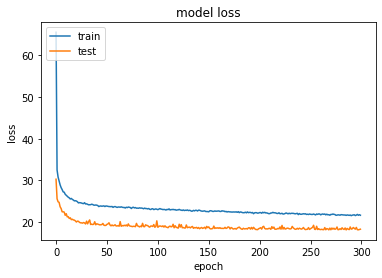

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('best_model')

INFO:tensorflow:Assets written to: best_model/assets


INFO:tensorflow:Assets written to: best_model/assets


In [ ]:
model = keras.models.load_model('best_model')

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
print(model.evaluate(X_val, y_val))

355/355 [==============================] - 1s 2ms/step - loss: 18.7056 - mae: 18.7056
[18.70562744140625, 18.70562744140625]


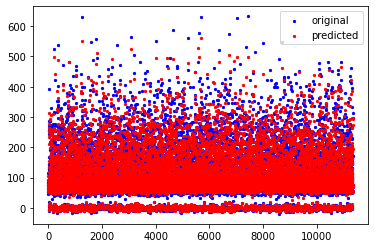

In [ ]:
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_val, s=5, color="blue", label="original")
plt.scatter(x_ax, y_pred, s=5, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
y_test = model.predict(X_test)

In [ ]:
y_sub = []
for l in y_test:
    y_sub.extend(l)
y_sub

[187.00818,
 44.978962,
 67.707726,
 57.68787,
 62.844555,
 62.789974,
 168.14093,
 188.69182,
 73.76178,
 155.9752,
 56.392292,
 70.433685,
 218.49895,
 169.15038,
 102.75564,
 149.95847,
 61.476727,
 55.069664,
 128.83543,
 70.645676,
 200.84702,
 121.926735,
 79.99931,
 81.951355,
 244.06894,
 132.65115,
 123.4528,
 221.69824,
 73.71813,
 70.71569,
 110.87136,
 81.68237,
 280.65268,
 90.71822,
 147.11406,
 75.23228,
 261.5466,
 67.715744,
 79.40352,
 200.88846,
 95.46575,
 83.98537,
 88.6433,
 199.13054,
 63.300343,
 102.35509,
 215.11053,
 169.5565,
 63.6391,
 81.19502,
 75.17785,
 98.035286,
 171.11588,
 85.338,
 216.4692,
 98.95992,
 273.00537,
 105.77042,
 73.73261,
 136.00526,
 62.430595,
 67.07391,
 169.29242,
 145.49634,
 165.50024,
 74.8914,
 81.17337,
 125.1214,
 79.69994,
 78.13547,
 86.11942,
 75.40655,
 168.6334,
 82.82703,
 84.43798,
 85.188774,
 138.66316,
 186.32912,
 70.51223,
 175.89896,
 98.365486,
 178.58391,
 57.78131,
 113.2456,
 169.477,
 56.212524,
 53.91505,


In [ ]:
df_sub = pd.DataFrame()
df_sub['id'] = [i+68614 for i in range(df_test.shape[0])]
df_sub['CO2_working_capacity [mL/g]'] = [y for y in y_sub]

In [ ]:
df_sub

,id,CO2_working_capacity [mL/g]
0,68614,187.008179
1,68615,44.978962
2,68616,67.707726
3,68617,57.687870
4,68618,62.844555
...,...,...
16995,85609,-8.537334
16996,85610,1.180874
16997,85611,0.958408
16998,85612,0.744723


In [ ]:
df_sub.to_csv('submission.csv', index=False)